<a href="https://colab.research.google.com/github/AsminiKOD/ClientPredicting/blob/RandomForest/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random Forest Model

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import pandas as pd

# Load the dataset
file_path = 're-duplicates-handled.csv'
data = pd.read_csv(file_path)

# Drop rows with NaN in the target variable
data.dropna(subset=['y'], inplace=True)

# Separate features and target variable
X = data.drop(columns=['y'])
y = data['y']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the Random Forest model with hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 15, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the model on training and testing data
y_train_pred = best_rf_model.predict(X_train_resampled)
y_test_pred = best_rf_model.predict(X_test)

y_train_proba = best_rf_model.predict_proba(X_train_resampled)[:, 1]
y_test_proba = best_rf_model.predict_proba(X_test)[:, 1]

test_auc = roc_auc_score(y_test, y_test_proba)

train_report = classification_report(y_train_resampled, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

print("Training Set Classification Report:")
print(train_report)

print("Testing Set Classification Report:")
print(test_report)
print(f"Testing Set ROC AUC Score: {test_auc:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     27438
           1       0.95      0.93      0.94     27438

    accuracy                           0.94     54876
   macro avg       0.94      0.94      0.94     54876
weighted avg       0.94      0.94      0.94     54876

Testing Set Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      6859
           1       0.44      0.49      0.47       917

    accuracy                           0.87      7776
   macro avg       0.69      0.70      0.70      7776
weighted avg       0.87      0.87      0.87      7776

Testing Set ROC AUC Score: 0.78


###Visualization

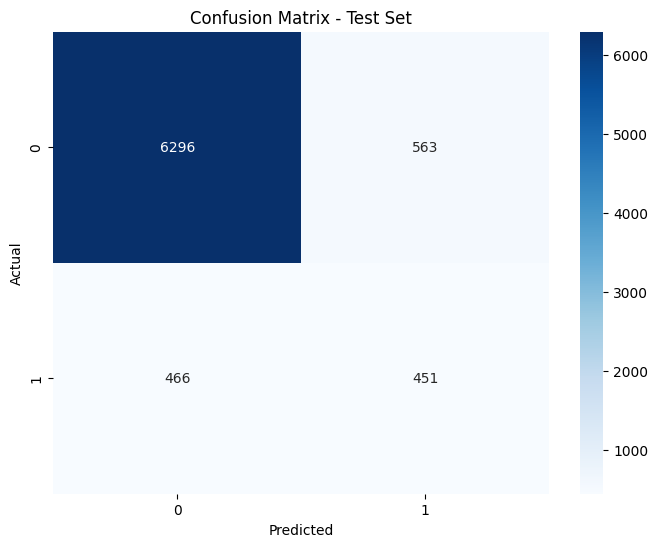

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Test Set
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_rf_model.classes_, yticklabels=best_rf_model.classes_)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
